In [1]:
import torch
import open3d.ml.torch as ml3d
import pickle

with open('outputs.pkl', 'rb') as f:
    outputs = pickle.load(f)

pixelwise_features = torch.load("blip_noneva_pixelwise_rendfet_features.pt").float().cpu()
xyz_pts = torch.tensor(outputs['xyz_pts']).float().cpu()


# sanity check
print(pixelwise_features.shape)
print(xyz_pts.shape)
print(pixelwise_features[1000])
print(xyz_pts[1000])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
torch.Size([2615298, 1408])
torch.Size([2615298, 3])
tensor([ 0.0204, -0.0090,  0.0035,  ..., -0.0160,  0.0002,  0.0062])
tensor([-78.3024,  10.9022,  15.0586])


In [2]:
i = 0
agg_rate = 0.1
pts_remaining = [xyz_pts.shape[0]]
while xyz_pts.shape[0] > 20000:
    xyz_pts, pixelwise_features = ml3d.ops.voxel_pooling(xyz_pts, pixelwise_features, agg_rate, position_fn='average', feature_fn='max')
    print(f"voxel agg. iteration {i}: {xyz_pts.shape[0]} points remaining, aggregated with voxel size {agg_rate}")
    i += 1

    agg_rate += 0.1
    pts_remaining.append(xyz_pts.shape[0])

print(f"Completed voxel aggregation with {xyz_pts.shape[0]} points")

voxel agg. iteration 0: 1445396 points remaining, aggregated with voxel size 0.1
voxel agg. iteration 1: 801231 points remaining, aggregated with voxel size 0.2
voxel agg. iteration 2: 404360 points remaining, aggregated with voxel size 0.30000000000000004
voxel agg. iteration 3: 236925 points remaining, aggregated with voxel size 0.4
voxel agg. iteration 4: 149542 points remaining, aggregated with voxel size 0.5
voxel agg. iteration 5: 97637 points remaining, aggregated with voxel size 0.6
voxel agg. iteration 6: 70223 points remaining, aggregated with voxel size 0.7
voxel agg. iteration 7: 52574 points remaining, aggregated with voxel size 0.7999999999999999
voxel agg. iteration 8: 40574 points remaining, aggregated with voxel size 0.8999999999999999
voxel agg. iteration 9: 32766 points remaining, aggregated with voxel size 0.9999999999999999
voxel agg. iteration 10: 26602 points remaining, aggregated with voxel size 1.0999999999999999
voxel agg. iteration 11: 21227 points remaining,

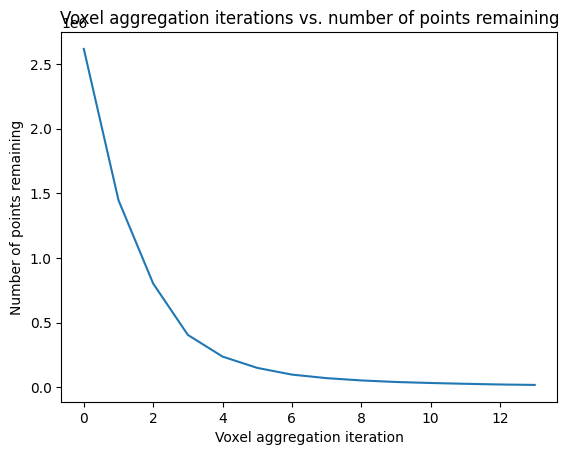

In [3]:
import matplotlib.pyplot as plt
plt.plot(pts_remaining)
plt.xlabel("Voxel aggregation iteration")
plt.ylabel("Number of points remaining")
plt.title("Voxel aggregation iterations vs. number of points remaining")
plt.show()

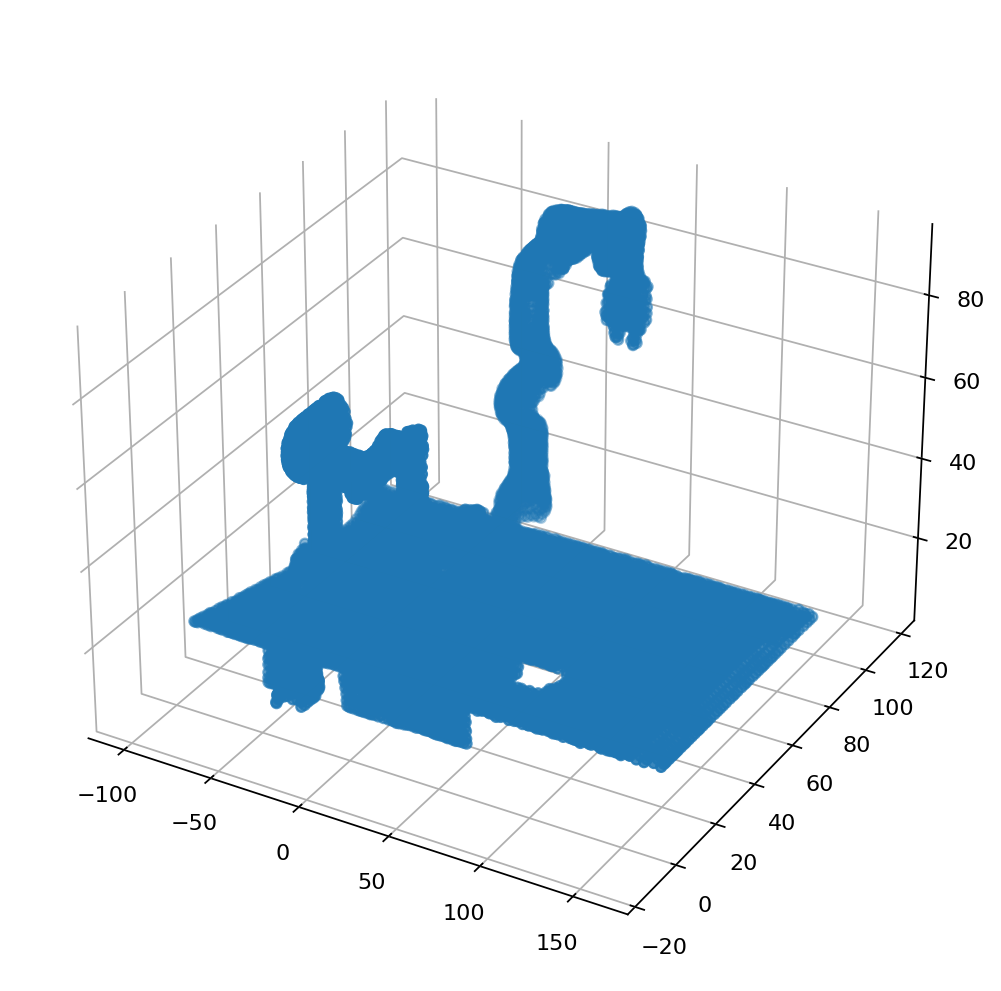

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6), dpi=160)
ax = fig.add_subplot(111, projection="3d")
background_color = (1.0, 1.0, 1.0)
ax.set_facecolor(background_color)
ax.w_xaxis.set_pane_color(background_color)  # type: ignore
ax.w_yaxis.set_pane_color(background_color)  # type: ignore
ax.w_zaxis.set_pane_color(background_color)  # type: ignore

x, y, z = (
    xyz_pts[:, 0],
    xyz_pts[:, 1],
    xyz_pts[:, 2],
)
ax.scatter(
    x,
    y,
    z,
)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# now we normalize the features for each object and then for the image as a whole

In [5]:
torch.save(pixelwise_features, "blip_noneva_pixelwise_rendfet_features.pt")
torch.save(xyz_pts, "blip_noneva_pixelwise_rendfet_xyz.pt")